## Importing the required packages and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
df = pd.read_csv('Data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
nans = df.loc[df.isna().any(axis=1)]
nulls = df.loc[df.isnull().any(axis=1)]
nans.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [5]:
nulls.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [8]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

### Note: Low BP does not seem to be life threatening provided that it doesn't cause any oxygen deprivation. Dizziness and feeling weak is a fairly common symptom of low BP. 

#### Source: https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465
 

### High BP is a more severe situation for us and often requires medications as treatment. If left untreated, it can cause stroke, heart attack and many other health problems. 

#### More info : https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure

## Some charts to see distribution of each feature. (Without splitting the data for training and testing because the dataset is very small)

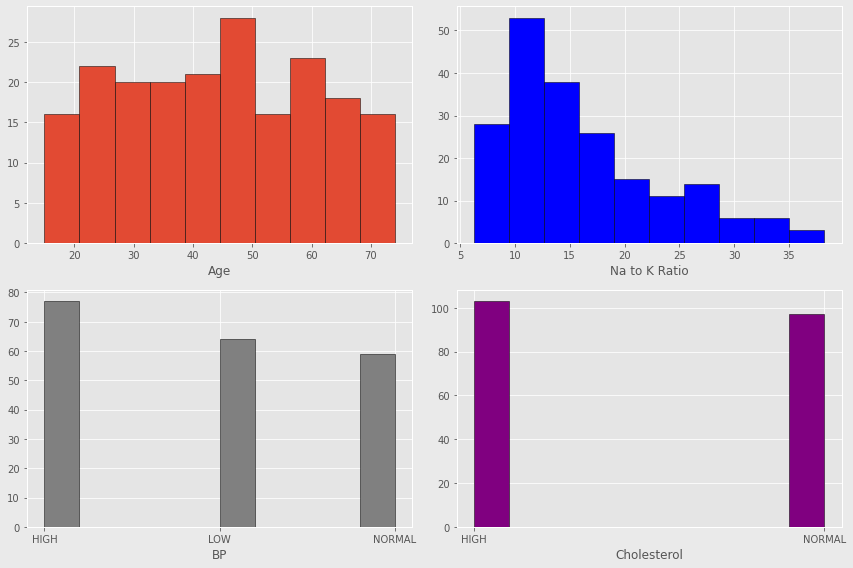

In [9]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12,8], facecolor='#EAEAEA')

ax[0,0].hist(df['Age'], edgecolor='k')
ax[0,0].set_xlabel('Age')

ax[0,1].hist(df['Na_to_K'], edgecolor='k', facecolor='blue')
ax[0,1].set_xlabel('Na to K Ratio')

ax[1,0].hist(df['BP'], edgecolor='k', facecolor='grey')
ax[1,0].set_xlabel('BP')

ax[1,1].hist(df['Cholesterol'], edgecolor='k', facecolor='purple')
ax[1,1].set_xlabel('Cholesterol')

# plt.grid(axis='y', color='#3475D0', lw = 0.5, alpha=0.7)
# ax[1,1].spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

### Encoding categorical features

In [10]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df, random_state=42)

In [11]:
train_df = shuffled_df.iloc[:176, :]
test_df = shuffled_df.iloc[176:, :]

In [12]:
train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
95,36,M,LOW,NORMAL,11.424,drugX
15,16,F,HIGH,NORMAL,15.516,DrugY
30,18,F,NORMAL,NORMAL,8.750,drugX
158,59,F,LOW,HIGH,10.444,drugC
128,47,M,LOW,NORMAL,33.542,DrugY


In [13]:
train_df['high_cholesterol'] = train_df['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0})

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,high_cholesterol
95,36,M,LOW,NORMAL,11.424,drugX,0
15,16,F,HIGH,NORMAL,15.516,DrugY,0
30,18,F,NORMAL,NORMAL,8.750,drugX,0
158,59,F,LOW,HIGH,10.444,drugC,1
128,47,M,LOW,NORMAL,33.542,DrugY,0


In [15]:
dm1 = pd.get_dummies(train_df['Sex'])
dm2 = pd.get_dummies(train_df['BP'])

In [16]:
train_df = pd.concat([train_df, dm1, dm2], axis=1)

In [17]:
train_df = train_df.drop(['Cholesterol', 'Sex', 'BP'], axis=1)

#### Splitting X and y and model training

In [18]:
X_train_df = train_df.drop('Drug', axis=1)
y_train_df = train_df['Drug']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_df_scaled = scaler.fit_transform(X_train_df)

In [20]:
from sklearn.svm import SVC

In [21]:
svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train_df_scaled, y_train_df)

SVC()

In [22]:
svc_clf.score(X_train_df_scaled, y_train_df)

0.9431818181818182

#### Validation and trying different models

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(svc_clf, X_train_df_scaled, y_train_df, cv=5, scoring='accuracy')

array([1.        , 0.8       , 0.97142857, 0.8       , 0.85714286])

In [24]:
from sklearn.model_selection import cross_val_predict

train_pred = cross_val_predict(svc_clf, X_train_df_scaled, y_train_df, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_df, train_pred)

array([[68,  1,  2,  2,  6],
       [ 1, 22,  0,  0,  0],
       [ 0,  2, 13,  0,  0],
       [ 7,  0,  0,  5,  0],
       [ 1,  0,  0,  0, 46]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(x, y):
    precision = precision_score(x, y, average='micro')
    recall = recall_score(x, y, average='micro')
    f1 = f1_score(x, y, average='micro')
    
    print('Precision : ' + str(precision))
    print('recall : ' + str(recall))
    print('f1 : ' + str(f1))

In [27]:
scores(y_train_df, train_pred)

Precision : 0.875
recall : 0.875
f1 : 0.875


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train_df_scaled, y_train_df)
rfc_pred = rfc_clf.predict(X_train_df_scaled)
scores(y_train_df, rfc_pred)

Precision : 1.0
recall : 1.0
f1 : 1.0


In [29]:
cv_scores = cross_val_score(rfc_clf, X_train_df_scaled, y_train_df, cv=3)
cv_scores

array([1.        , 1.        , 0.98275862])

#### Looks like randomforest classifier is being overfit.

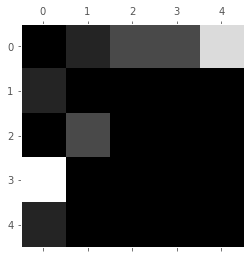

In [30]:
svc_matrix = confusion_matrix(y_train_df, train_pred)
row_sum = svc_matrix.sum(axis=1, keepdims=True)
scv_matrix_norm = svc_matrix / row_sum
np.fill_diagonal(svc_matrix, 0)
plt.matshow(svc_matrix, cmap=plt.cm.gray)
plt.grid()

In [31]:
train_pred1 = pd.DataFrame(train_pred)
y_train_df1 = pd.DataFrame(y_train_df)
pd.concat([train_pred1, y_train_df1])

,0,Drug
0,drugX,NaN
1,DrugY,NaN
2,drugX,NaN
3,DrugY,NaN
4,DrugY,NaN
...,...,...
88,NaN,DrugY
21,NaN,DrugY
57,NaN,DrugY
160,NaN,drugX


### Cannot find out which drugs are being misclassified into which because so many NaNs appeared when I tried to create a df with predictions and actual data. No idea why that's happening.

### Gridsearching for better hyperparameters

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'C' :[1,100,1000], 'kernel' :['linear', 'rbf'], 'gamma' :['scale', 'auto']}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=params, cv=2)

In [33]:
grid_svc.fit(X_train_df_scaled, y_train_df)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [34]:
final_model = grid_svc.best_estimator_
final_model

SVC(C=100, kernel='linear')

### One big function for entire data transformation

In [35]:
train_df.head()

,Age,Na_to_K,Drug,high_cholesterol,F,M,HIGH,LOW,NORMAL
95,36,11.424,drugX,0,0,1,0,1,0
15,16,15.516,DrugY,0,1,0,1,0,0
30,18,8.750,drugX,0,1,0,0,0,1
158,59,10.444,drugC,1,1,0,0,1,0
128,47,33.542,DrugY,0,0,1,0,1,0


In [36]:
train_df = shuffled_df.iloc[:176, :]
test_df = shuffled_df.iloc[176:, :]
train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
95,36,M,LOW,NORMAL,11.424,drugX
15,16,F,HIGH,NORMAL,15.516,DrugY
30,18,F,NORMAL,NORMAL,8.750,drugX
158,59,F,LOW,HIGH,10.444,drugC
128,47,M,LOW,NORMAL,33.542,DrugY


In [37]:
def pipeliney(data):
    
    if 'Drug' in data.columns:
        y = data['Drug']
        data = data.drop('Drug', axis=1)
    else:
        y = None
        
    features = list(data.columns)
        
#     from sklearn.impute import SimpleImputer
    
    data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0})
    
    numeric_df = data.select_dtypes(include=np.number)
#     imputer = SimpleImputer(strategy='median')
#     imputed_df = imputer.fit_transform(numeric_df)
    
    from sklearn.preprocessing import OneHotEncoder
    
    object_df = data.select_dtypes(exclude=np.number)
    onehot = OneHotEncoder(sparse=False)
    encoded_df = onehot.fit_transform(object_df)
    
    features = features + onehot.categories_[0].tolist()
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(numeric_df)
    
    transformed_df = np.hstack([scaled_df, encoded_df])
    
    return transformed_df, y, features

### Retraining model because I accidentally scaled columns that didn't need to be scaled.

In [38]:
train_df1 = train_df.copy()

transformed_train1, y1, features1 = pipeliney(train_df1)

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'C' :[1,100,1000], 'kernel' :['linear', 'rbf'], 'gamma' :['scale', 'auto']}

svc2 = SVC()
grid_svc1 = GridSearchCV(svc2, param_grid=params, cv=2)
grid_svc1.fit(transformed_train1, y1)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [42]:
final_model1 = grid_svc1.best_estimator_
svc_pred1 = final_model1.predict(transformed_train1)
scores(y1, svc_pred1)

Precision : 1.0
recall : 1.0
f1 : 1.0


In [43]:
test1 = test_df.copy()

transformed_test, y, features = pipeliney(test1)

final_pred = final_model1.predict(transformed_test)

scores(y, final_pred)

Precision : 1.0
recall : 1.0
f1 : 1.0


In [44]:
for pred, actual in zip(final_pred, np.array(y)):
    print(f'Predicted: {pred} Actual: {actual}')

Predicted: drugX Actual: drugX
Predicted: drugX Actual: drugX
Predicted: DrugY Actual: DrugY
Predicted: drugC Actual: drugC
Predicted: drugC Actual: drugC
Predicted: DrugY Actual: DrugY
Predicted: drugC Actual: drugC
Predicted: DrugY Actual: DrugY
Predicted: drugB Actual: drugB
Predicted: drugX Actual: drugX
Predicted: DrugY Actual: DrugY
Predicted: drugX Actual: drugX
Predicted: DrugY Actual: DrugY
Predicted: DrugY Actual: DrugY
Predicted: DrugY Actual: DrugY
Predicted: drugX Actual: drugX
Predicted: DrugY Actual: DrugY
Predicted: DrugY Actual: DrugY
Predicted: DrugY Actual: DrugY
Predicted: drugX Actual: drugX
Predicted: drugX Actual: drugX
Predicted: DrugY Actual: DrugY
Predicted: DrugY Actual: DrugY
Predicted: drugC Actual: drugC


### 100% Accuracy? Something seems wrong. Should've done a correlation heatmap to see whether the classifications are obvious. Will come back to this later 